# Research Questions 
## Trends in airplane crashes over time 
    How has the frequency in of airplane crashes changed over key aviation milestones
    What is the trend in the severity of airplane crahses over time
## Air travel demand and infrastructure 
    Is there a relationship between the volume of air travel passengers and crash rates over the years 
    How has the introduction of larger aircrafts impacted the number of fatalities per crash
## Global regulations and safety standards
    How has the implementation of international safety standards affected airplane crashes frequency

In [1]:
# setting up the enviroment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
import pandas as pd
from pandasai import PandasAI

# Step 1: Create a sample DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [24, 27, 22, 32, 28],
    'Income': [50000, 60000, 55000, 70000, 75000]
}

df = pd.DataFrame(data)

# Step 2: Initialize PandasAI
pandas_ai = PandasAI()

# Step 3: Ask a simple question to PandasAI
query = "What is the average income?"

# Step 4: Get the result
result = pandas_ai.ask(df, query)

# Step 5: Print the result
print("Result:", result)


ModuleNotFoundError: No module named 'pandasai'

In [3]:
# getting the cleaned dataset
df = pd.read_csv('airplane_crashes_cleaned.csv', delimiter = ',', header = 0)
df.loc[(df['Country'] == 'Republic of Congo'), 'Country'] = 'Democratic Republic of Congo'
df.head()

,Unnamed: 0,Year,Quarter,Month,Day,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard,Country,Date
0,0,1908,Qtr 3,September,17,Wright,Wright Flyer III?,Fort Myer Virginia,Army U.S. - Military,0,1,2,USA,1908-09-17
1,1,1909,Qtr 3,September,7,Wright,Wright ByplaneSC1,Juvisy-sur-Orge France?,NaN,0,1,1,France,1909-09-07
2,2,1912,Qtr 3,July,12,NaN,Dirigible?,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5,New Zealand,1912-07-12
3,3,1913,Qtr 3,August,6,Curtiss,Curtiss seaplane?,Victoria British,Canada Columbia Private,0,1,1,UK,1913-08-06
4,4,1913,Qtr 3,September,9,Zeppelin,Zeppelin L 1 (airship)?,Over the North SeaMilitary - German Navy,NaN,0,14,20,UK,1913-09-09


# EDA

## Numerical univariate

In [4]:
# Select only numerical columns
numerical_cols = df[['Ground', 'Fatalities (air)', 'Aboard']]

# Get descriptive statistics for numerical columns
stats = numerical_cols.describe()

# Print the statistics
stats

,Ground,Fatalities (air),Aboard
count,5033.000000,5033.000000,5033.000000
mean,1.705146,22.221737,31.113650
std,55.116055,34.954890,45.747621
min,0.000000,0.000000,0.000000
25%,0.000000,4.000000,7.000000
50%,0.000000,11.000000,16.000000
75%,0.000000,25.000000,35.000000
max,2750.000000,583.000000,644.000000


According to the summary statistics above, there is a discrepency with the 'Ground' column, to confiirm this let's see the unique value in the column and understand the possible disperion of the column's data manually

In [5]:
# Get unique values and their counts in the 'Ground' column
value_counts = df['Ground'].value_counts().sort_values()

# Convert to a dictionary to get a key-value format
unique_values_with_counts = value_counts.to_dict()

# Print the result
unique_values_with_counts

{85: 1,
 32: 1,
 45: 1,
 39: 1,
 18: 1,
 225: 1,
 49: 1,
 9: 1,
 78: 1,
 40: 1,
 50: 1,
 31: 1,
 71: 1,
 33: 1,
 23: 1,
 87: 1,
 17: 1,
 29: 1,
 16: 1,
 36: 1,
 58: 1,
 63: 1,
 113: 1,
 53: 1,
 2750: 2,
 37: 2,
 15: 2,
 125: 2,
 25: 2,
 35: 2,
 30: 2,
 20: 3,
 24: 3,
 13: 4,
 12: 4,
 11: 4,
 44: 4,
 22: 4,
 19: 4,
 14: 5,
 10: 6,
 6: 6,
 8: 9,
 7: 10,
 5: 12,
 4: 16,
 3: 22,
 2: 36,
 1: 62,
 0: 4781}

The above result shows that high numbers in ground casualties happen less often that, this is explained with the less number of counts (1 and 2), also we can see the outlier that skews our descriptive statistics which is '2750'. we can go ahead and analyze this row to get an idea of what exactly is going on before deciding it's fate

In [6]:
temp = df[df['Ground'] == 2750]
temp

,Unnamed: 0,Year,Quarter,Month,Day,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard,Country,Date
4358,4358,2001,Qtr 3,September,11,Boeing,Boeing 767 223ERN334AA,New York City New,Airlines YorkAmerican,2750,92,92,New Zealand,2001-09-11
4359,4359,2001,Qtr 3,September,11,Boeing,Boeing B 767,New York City New,Lines Air YorkUnited,2750,65,65,New Zealand,2001-09-11


After confirming the event through the date it is apperent that this is the infamous 9/11 event where Al'Qaeda attacked the United States of America.

    We have to chamge the Country to USA not New zealand.

In [7]:
# Update the 'Country' value to "USA" for the specific condition
df.loc[(df['Country'] == "New Zealand") & (df['Date'] == "2001-09-11"), 'Country'] = "USA"
nine_eleven = df[df['Date'] == '2001-09-11']
nine_eleven

,Unnamed: 0,Year,Quarter,Month,Day,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard,Country,Date
4356,4356,2001,Qtr 3,September,11,Boeing,Boeing B 757,Arlington Virginia.American,Airlines,125,64,64,USA,2001-09-11
4357,4357,2001,Qtr 3,September,11,Boeing,Boeing B 757,Shanksville Pennsylvania,Lines Air United,0,44,44,USA,2001-09-11
4358,4358,2001,Qtr 3,September,11,Boeing,Boeing 767 223ERN334AA,New York City New,Airlines YorkAmerican,2750,92,92,USA,2001-09-11
4359,4359,2001,Qtr 3,September,11,Boeing,Boeing B 767,New York City New,Lines Air YorkUnited,2750,65,65,USA,2001-09-11


After further investigation, i discovered that the two outliers are actually the sum of total ground casualties caused by both planes crashing into the world trade center so i've decided to share the number equally between both, here is a refference([9/11 wikipedia](https://en.wikipedia.org/wiki/September_11_attacks)).

In [8]:
df.loc[(df['Aircraft'] == "Boeing 767 223ERN334AA") & (df['Ground'] == 2750), 'Ground'] = 1375
df.loc[(df['Aircraft'] == "Boeing B 767") & (df['Ground'] == 2750), 'Ground'] = 1375

nine_eleven = df[df['Date'] == '2001-09-11']
nine_eleven

,Unnamed: 0,Year,Quarter,Month,Day,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard,Country,Date
4356,4356,2001,Qtr 3,September,11,Boeing,Boeing B 757,Arlington Virginia.American,Airlines,125,64,64,USA,2001-09-11
4357,4357,2001,Qtr 3,September,11,Boeing,Boeing B 757,Shanksville Pennsylvania,Lines Air United,0,44,44,USA,2001-09-11
4358,4358,2001,Qtr 3,September,11,Boeing,Boeing 767 223ERN334AA,New York City New,Airlines YorkAmerican,1375,92,92,USA,2001-09-11
4359,4359,2001,Qtr 3,September,11,Boeing,Boeing B 767,New York City New,Lines Air YorkUnited,1375,65,65,USA,2001-09-11


### Let's go ahead and explore each numeric column graphically
#### 1. Ground column

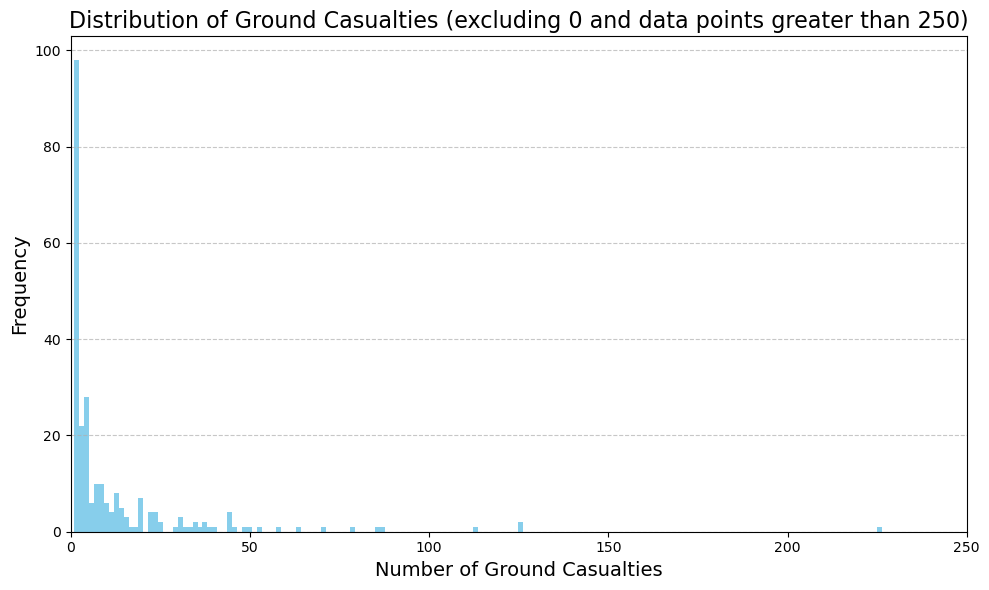

In [9]:
# I have decided to exclude data points with counts of 0 and the two '1375' datapoints from the visual as they are extreme outlier offsetting the visual

# Filter out rows where 'Ground' is 0
ground = df[df['Ground'] > 0]['Ground']

# Plot the histogram for the 'Ground' column
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(ground, bins=1000, color='skyblue')  # Adjust bins for clarity

# Add titles and labels
plt.title('Distribution of Ground Casualties (excluding 0 and data points greater than 250)', fontsize=16)
plt.xlabel('Number of Ground Casualties', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set x-axis range
plt.xlim(0, 250)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

The graph above shows that the density of ground casualties are closer to 0, only in extreme situations do ground casualties be much, an example of this is the 9/11 event.

#### 2. Fatalities (air) column

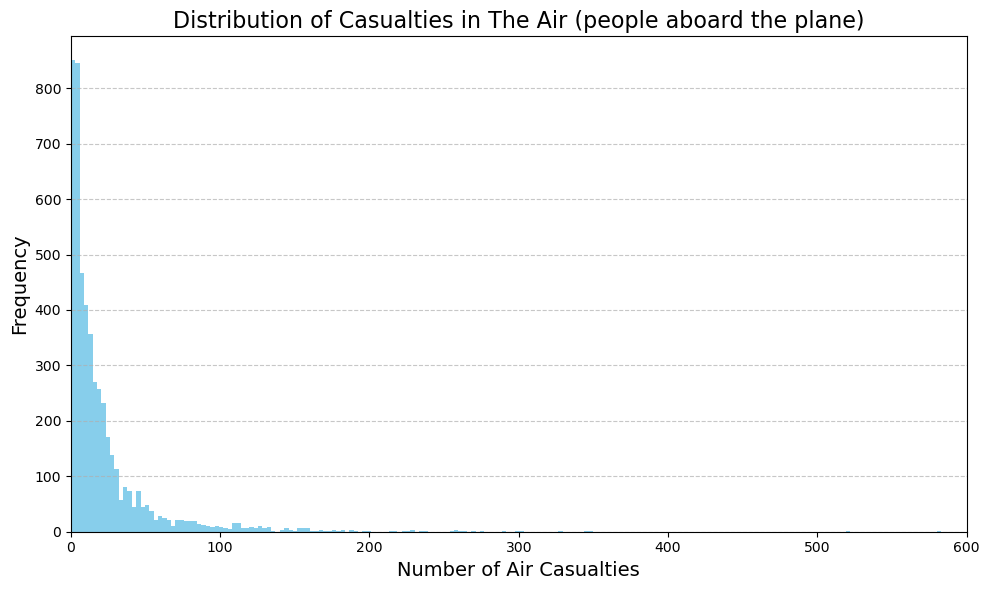

In [10]:
air = df['Fatalities (air)']

# Plot the histogram for the 'Ground' column
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(air, bins=200, color='skyblue')  # Adjust bins for clarity

# Add titles and labels
plt.title('Distribution of Casualties in The Air (people aboard the plane)', fontsize=16)
plt.xlabel('Number of Air Casualties', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set x-axis range
plt.xlim(0, 600)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Similar to the previuos graph, this graphs shows that the desinty of air casualties is closer to 0 though it's worth noting that this distribution has a bit more spread to the right hand side compared to that of ground casualties infering that air casualties happen more that ground casualties. 

#### 3. Aboard column

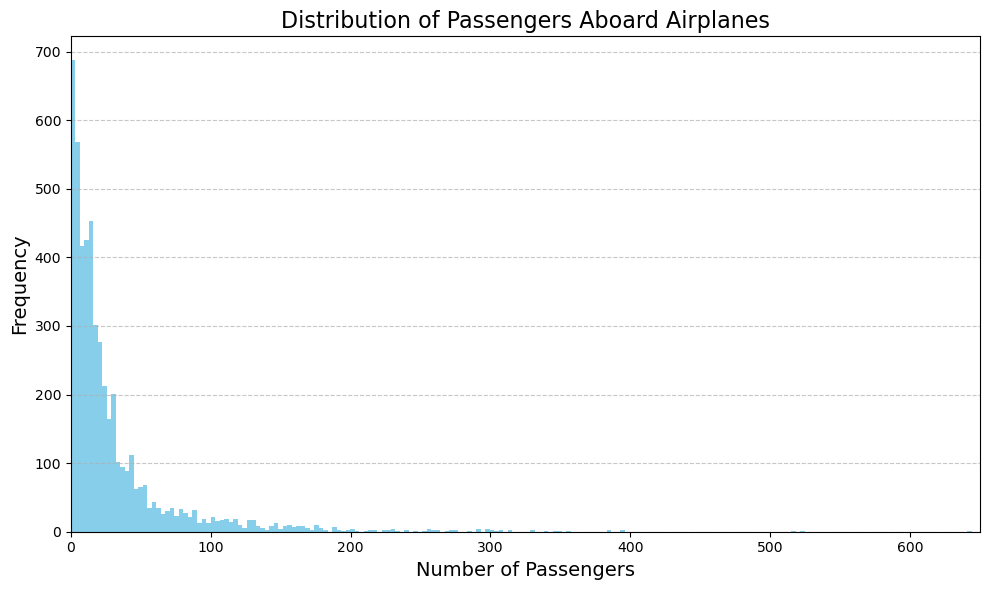

In [11]:
aboard = df['Aboard']

# Plot the histogram for the 'Ground' column
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(aboard, bins=200, color='skyblue')  # Adjust bins for clarity

# Add titles and labels
plt.title('Distribution of Passengers Aboard Airplanes', fontsize=16)
plt.xlabel('Number of Passengers', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Set x-axis range
plt.xlim(0, 650)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Similar to the two previous graphs, the density of the number of passengers involved in plane crashes is closer to zero. This distribution implies that planes with larger capacity for passengers are involved less often in plane crashes compared to those with smaller passenger capacity.

## Numerical Multivariate

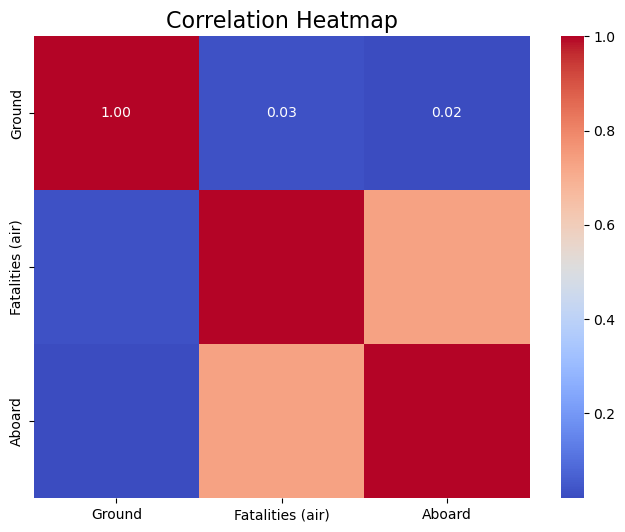

In [31]:
# Compute the correlation matrix
correlation_matrix = df[['Ground', 'Fatalities (air)', 'Aboard']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


The heat map above shows the correlation of the numeric columns.
1. Ground & Fatalities (air): the correlation between ground casualties and fatalities of passengers in the airplane is 0.03, this indicates that there's almost no correlation between both variables.

2. Fatalities (air) & Aboard: the correlation between the passengers involved in airplane crashes and those who actually sustain fatalities is closer to 1 (0.73), this indicates a decently strong correlation between both variables, it can also be translated as around 70% of passengers involved in a plane crash are likely to sustain fatalities.

3. Aboard and Ground: this has the weakest correlation (0.02) and just like ground casualties vs fatalities in the air, there's almost no causal relationship between both.

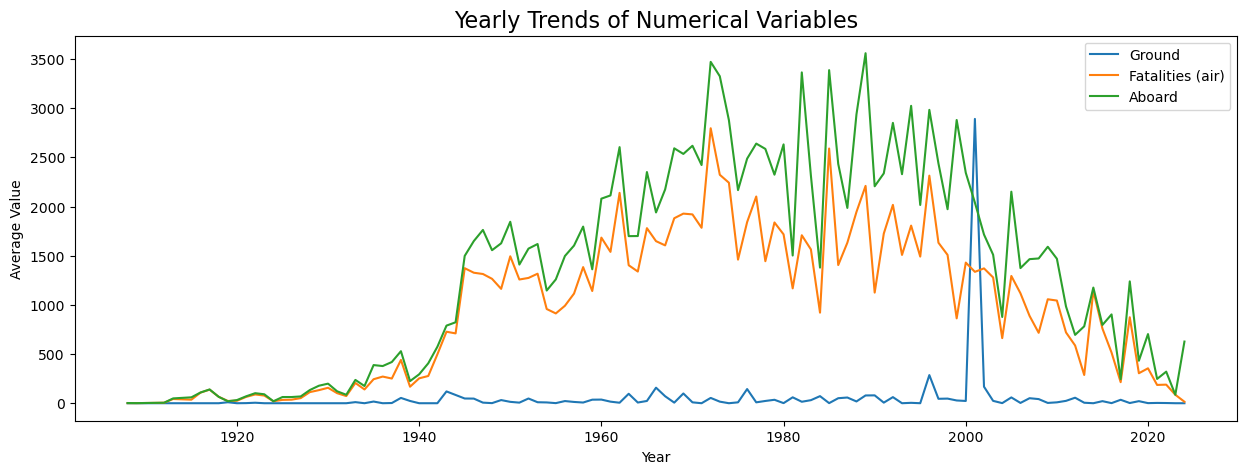

In [ ]:
# Group by year and calculate means
time_data = df.groupby('Year')[['Ground', 'Fatalities (air)', 'Aboard']].sum()

# Plot time-series trends
time_data.plot(figsize=(15, 5))
plt.title("Yearly Trends of Numerical Variables", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.show()

The time series graph above shows the trend of the numeric columns over the years, each point represents the mean value in that year.

Key takeaways are as follows:
1. The blue line shows how ground casualties have stayed relatively low over the years signifying it's less commonality (all this is excluding the event of 9/11).

2. The orange and green line represents fatalities in the air and passengers on board respectively, it is worth noting that fatalities in the air is mostly less than but close to the number of passengers aboard the airplane, it is also worth noting the increase in difference between this two variables as time passes, this can be as a result of increased safety standards (conclusions will be made when answering the research questions).

## Categorical Univariate

In [14]:
# To check for missing values
print(df['Aircraft Manufacturer'].isnull().sum())

335


I decided to replace null values with 'Unknown'

In [15]:
df['Aircraft Manufacturer'] = df['Aircraft Manufacturer'].fillna('Unknown')
print(df['Aircraft Manufacturer'].isnull().sum())

0


In [16]:
# Check for unique manufacturers and their counts
aircraft_manufacturer_count = df['Aircraft Manufacturer'].value_counts().to_dict()
aircraft_manufacturer_count

{'McDonnell Douglas': 1131,
 'Boeing': 415,
 'Unknown': 335,
 'De Havilland': 294,
 'Antonov': 289,
 'Lockheed Martin': 278,
 'Ilyushin': 150,
 'Fokker': 139,
 'Curtiss': 133,
 'Tupolev': 107,
 'Vickers': 94,
 'Junkers': 91,
 'Convair': 89,
 'Fairchild': 86,
 'Cessna': 67,
 'Embraer': 63,
 'Sikorsky': 57,
 'Bell': 54,
 'Beechcraft': 54,
 'Consolidated': 51,
 'Avro': 50,
 'Yakovlev': 49,
 'Airbus': 48,
 'Let': 46,
 'Britten': 43,
 'CASA': 41,
 'Hawker Siddeley': 36,
 'Swearingen': 33,
 ' Short Brothers': 31,
 'Ford': 30,
 'Aérospatiale': 29,
 'Sud Aviation': 27,
 'Learjet': 27,
 'Grumman': 24,
 'Breguet': 23,
 'Dornier': 23,
 'Latecoere': 22,
 'Handley Page': 21,
 'British Aerospace': 21,
 'Bristol': 21,
 'Britten Norman': 20,
 'Lisunov': 19,
 'Eurocopter': 18,
 'Zeppelin': 18,
 'Messerschmitt': 17,
 'Rohrbach': 17,
 'Farman': 16,
 'Stinson': 16,
 'Savoia': 13,
 'Pilatus': 13,
 'Nord': 12,
 'Harbin Yunshuji': 8,
 'NAMC': 8,
 'Dassault': 8,
 'Aerocomp Comp Air': 8,
 'GAF Nomad': 7,
 'Ste

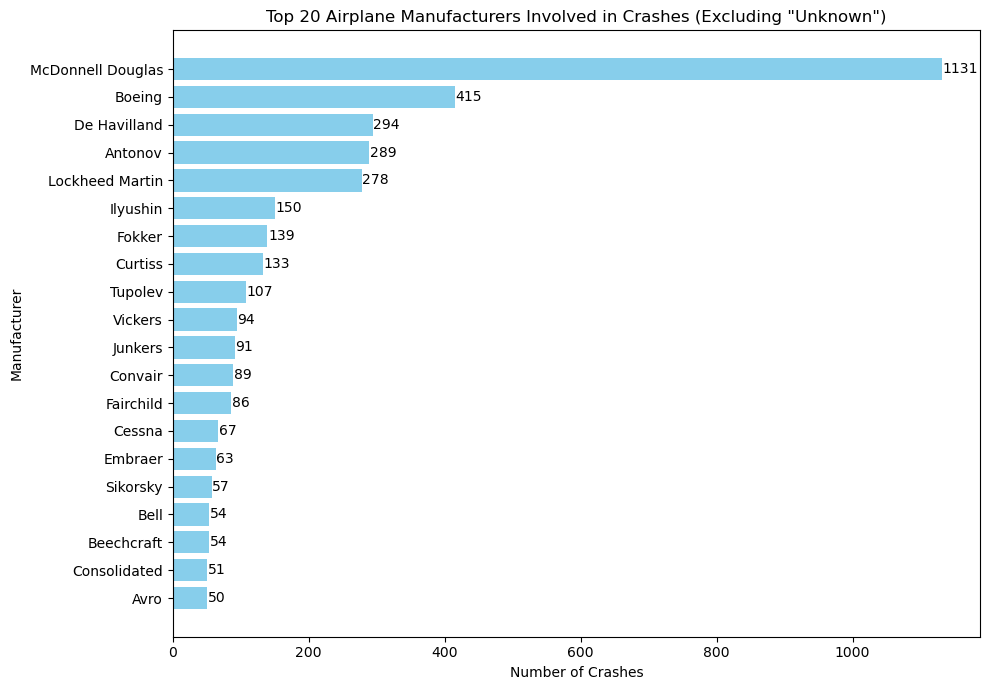

In [17]:
# Exclude 'Unknown' from the data
filtered_df = df[df['Aircraft Manufacturer'] != 'Unknown']

# Get top 10 manufacturers excluding 'Unknown'
top_manufacturers = filtered_df['Aircraft Manufacturer'].value_counts().head(20)

# Create a horizontal bar chart
plt.figure(figsize=(10, 7))
bars = plt.barh(top_manufacturers.index, top_manufacturers.values, color='skyblue')

# Add counts to the right of each bar
for bar, value in zip(bars, top_manufacturers.values):
    plt.text(value + 1, bar.get_y() + bar.get_height()/2, str(value), va='center')

# Add titles and labels
plt.title('Top 20 Airplane Manufacturers Involved in Crashes (Excluding "Unknown")')
plt.xlabel('Number of Crashes')
plt.ylabel('Manufacturer')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()

# Show the plot
plt.show()


From the chart above, we can see note the following
1. McDonnell Douglas is the most involved in crashes with a substantial amount, over twice its runner up. this is plausible as McDonnell Douglas was one of the biggest manufacturers during the early days of aviation building planes for both civilian travel and military endeavors. it is also worth noting that the DC family of aircrafts have a very poor safety record and was included in multiple crashes over the years of its service, this most likely contibutes to the high number of crashes.

2. Boeing is in second place and there are several pointers to this. First is the track record of the famous 737-MAX model with its reliability issues but also, Boeing also does military service and is one of the big players for the United States which can contribute to crash records.

3. All top five manufacturers are involved in military service over the years of aviation history.

In [18]:
# Frequency distribution of crashes by country
country_counts = df['Country'].value_counts()
country_counts_dict = country_counts.to_dict()
country_counts_dict

{'USA': 949,
 'Russia': 294,
 'UK': 186,
 'Brazil': 179,
 'France': 156,
 'Colombia': 154,
 'Canada': 133,
 'New Zealand': 128,
 'China': 111,
 'India': 111,
 'Indonesia': 97,
 'Germany': 90,
 'Italy': 87,
 'Mexico': 84,
 'Philippines': 72,
 'Australia': 68,
 'Vietnam': 63,
 'Spain': 61,
 'Democratic Republic of Congo': 57,
 'Venezuela': 55,
 'Peru': 53,
 'Bolivia': 48,
 'Iran': 47,
 'Japan': 46,
 'Afghanistan': 46,
 'Papua New Guinea': 46,
 'International Waters': 44,
 'Argentina': 43,
 'Angola': 41,
 'Egypt': 41,
 'Nepal': 37,
 'Pakistan': 36,
 'Taiwan': 36,
 'Nigeria': 35,
 'Ecuador': 32,
 'Greece': 31,
 'Sudan': 30,
 'Turkey': 30,
 'Ukraine': 29,
 'Myanmar': 28,
 'Morocco': 27,
 'Norway': 27,
 'Chile': 26,
 'Equatorial Guinea': 25,
 'Romania': 25,
 'Algeria': 24,
 'Korea, North': 23,
 'Laos': 22,
 'Thailand': 21,
 'Netherlands': 19,
 'South Africa': 19,
 'South Korea': 19,
 'Kenya': 19,
 'Saudi Arabia': 18,
 'Ethiopia': 18,
 'Switzerland': 18,
 'Belgium': 17,
 'Puerto Ricp': 17,
 '

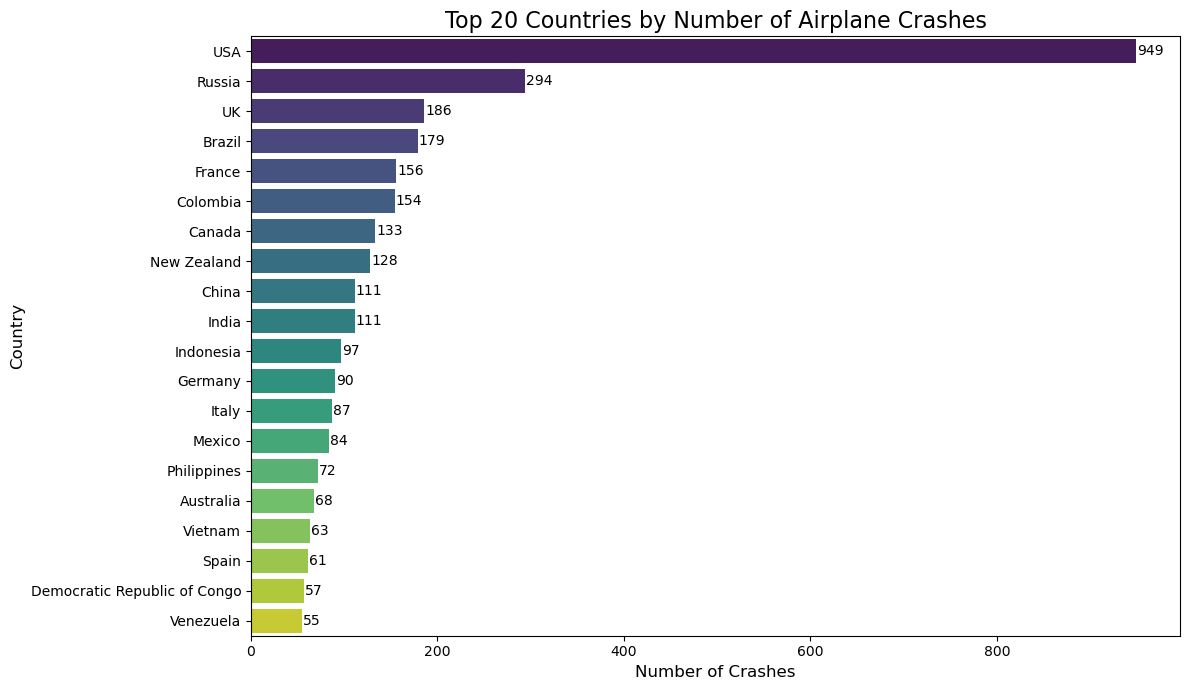

In [19]:
# Display the top 20 countries

top_20_countries = country_counts.head(20)

# Horizontal Bar Chart
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=top_20_countries.values, y=top_20_countries.index, palette='viridis')

# Annotate the counts beside each bar
for i, value in enumerate(top_20_countries.values):
    ax.text(value + 1, i, str(value), va='center', fontsize=10)  # Adjust position and font size as needed

# Add titles and labels
plt.title('Top 20 Countries by Number of Airplane Crashes', fontsize=16)
plt.xlabel('Number of Crashes', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()


From the chart above, we can see note the following
1. The top two country involved in crashes are the two biggest players in aerospace

2. Majority on the list are first world countries with rich histiry in aviation

3. USA has the most count indicating their strong prescence in aviation, this is notable as USA has the highest air traffic(they're practically the leaders in aviation today).

In [20]:
# Check for missing values
print(df['Operator'].isnull().sum())

233


In [21]:
# Replace missing values with 'Unknown'
df['Operator'] = df['Operator'].fillna('Unknown')
print(df['Operator'].isnull().sum())

0


In [22]:
operator_count = df['Operator'].value_counts().to_dict()
operator_count

{'Unknown': 233,
 'Aeroflot': 188,
 'Force Air U.S. - Military': 92,
 'Lufthansa Deutsche': 57,
 'France Air': 57,
 'Lines Air United': 37,
 'Corporation Aviation National China': 37,
 'Airlines Indian': 32,
 'Airways World American Pan': 29,
 'Forces Air Army U.S. - Military': 29,
 'Lines Air Philippine': 28,
 'Airlines Dutch Royal KLM': 26,
 'Service Mail Aerial US': 26,
 'Private': 25,
 'Avianca': 24,
 'Force Air Royal - Military': 23,
 'USSRAeroflot': 22,
 'Force Air -Royal Military': 21,
 'Airlines American': 21,
 'Sabena': 20,
 'Airlines Orient Northwest': 19,
 'Airways Imperial': 19,
 'VASP': 19,
 'Airlines Indonesia Garuda': 18,
 'Airways European British': 16,
 'Aeropostale': 15,
 'Lines Air Eastern': 15,
 'Varig': 15,
 'Airlines Nusantara Merpati': 15,
 'Air Western and Continental Trans': 15,
 'Army U.S. - Military': 14,
 'Aerolinie Ceskoslovenske': 14,
 'Airlines Ethiopian': 14,
 'Airlines International Pakistan': 14,
 'Cruzeiro': 14,
 'Force Air Indian - Military': 14,
 'N

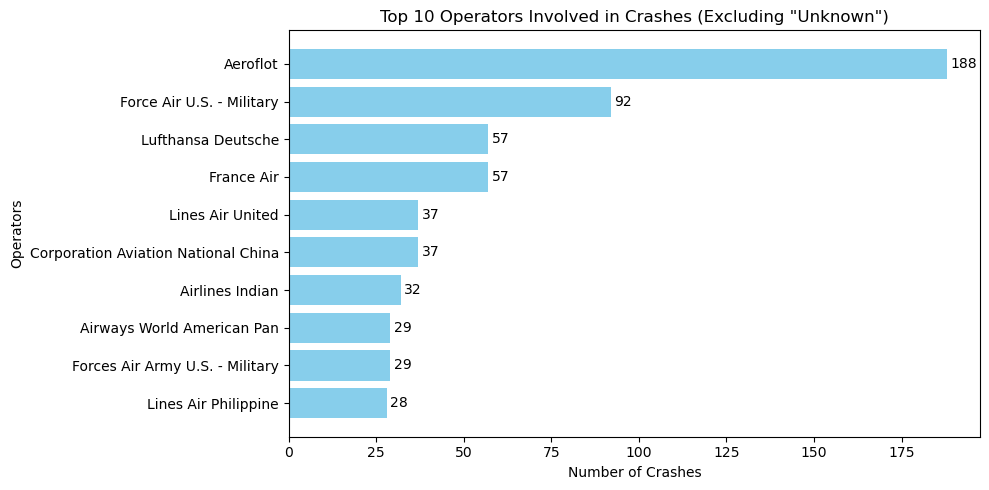

In [23]:
# Exclude 'Unknown' from the data
filtered_df = df[df['Operator'] != 'Unknown']

# Get top 10 operators excluding 'Unknown'
top_operators = filtered_df['Operator'].value_counts().head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 5))
bars = plt.barh(top_operators.index, top_operators.values, color='skyblue')

# Add counts to the right of each bar
for bar, value in zip(bars, top_operators.values):
    plt.text(value + 1, bar.get_y() + bar.get_height()/2, str(value), va='center')

# Add titles and labels
plt.title('Top 10 Operators Involved in Crashes (Excluding "Unknown")')
plt.xlabel('Number of Crashes')
plt.ylabel('Operators')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()

# Show the plot
plt.show()


The above chart shows that the top operators involved in crashes are national air travel operators, most notably Aeroflot which was one of the biggest airline operator in the 1900s. Aeroflot was the national airline operatror of the Soviet union and was one of the big players in commercial air travel at the time.

In [24]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Weekday'] = df['Date'].dt.day_name()  # Gives names like 'Monday'
df.head(5)

,Unnamed: 0,Year,Quarter,Month,Day,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard,Country,Date,Weekday
0,0,1908,Qtr 3,September,17,Wright,Wright Flyer III?,Fort Myer Virginia,Army U.S. - Military,0,1,2,USA,1908-09-17,Thursday
1,1,1909,Qtr 3,September,7,Wright,Wright ByplaneSC1,Juvisy-sur-Orge France?,Unknown,0,1,1,France,1909-09-07,Tuesday
2,2,1912,Qtr 3,July,12,Unknown,Dirigible?,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5,New Zealand,1912-07-12,Friday
3,3,1913,Qtr 3,August,6,Curtiss,Curtiss seaplane?,Victoria British,Canada Columbia Private,0,1,1,UK,1913-08-06,Wednesday
4,4,1913,Qtr 3,September,9,Zeppelin,Zeppelin L 1 (airship)?,Over the North SeaMilitary - German Navy,Unknown,0,14,20,UK,1913-09-09,Tuesday


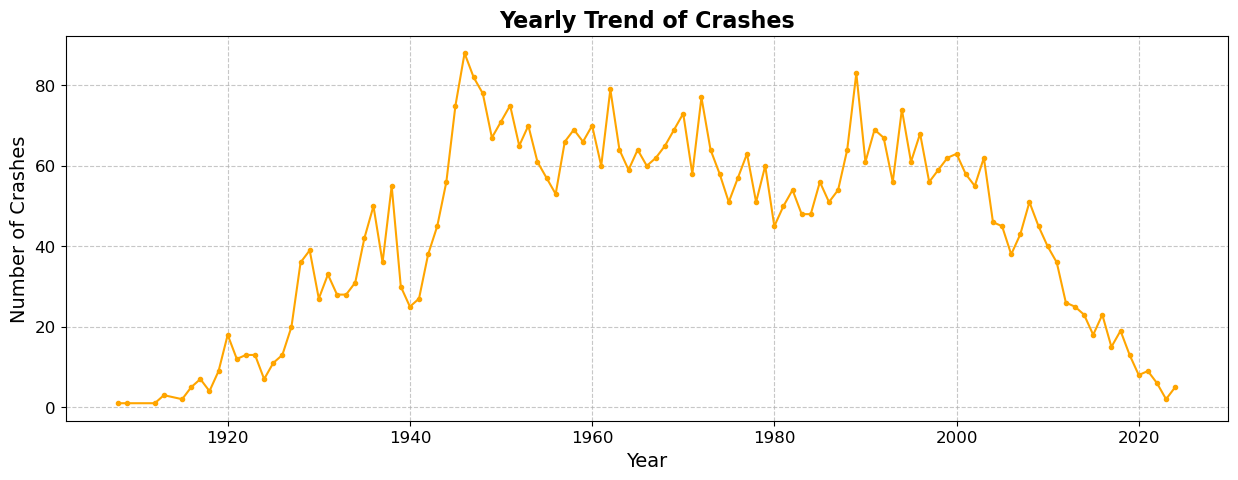

In [25]:
# Plotting the yearly trend
plt.figure(figsize=(15, 5))  
df['Year'].value_counts().sort_index().plot(
    kind='line',
    color='orange',
    marker='.',  
    title='Yearly Trend of Crashes'
)

# Customize labels and title
plt.title('Yearly Trend of Crashes', fontsize=16, fontweight='bold')  # Larger, bold title
plt.xlabel('Year', fontsize=14)  # X-axis label
plt.ylabel('Number of Crashes', fontsize=14)  # Y-axis label

# Customize ticks
plt.xticks(fontsize=12, rotation=0)  # X-axis ticks with 45-degree tilt
plt.yticks(fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


The trend above describes airplane crash incidents over the years since the inception of aircrafts in the early 1900s, the following can be noted from the chart, 
1. Aircraft crashes rose progressively during the early years eventually reaching it's peak in the 1940s which was also the period of WWII where a lot of aircrafts were used in the war efforts.

2. Aircraft crashes started declinign after WWII but the decline was not so signinficant withs ome year hitting high figures close to that of the highest figure.

3. Aircraft crashes would hit the second highest figure in aviation history at the height of the cold war, few years before trhe dissolution of the Soviet Union, this along with figures from the WWII period suggests that there are more airplane crashg incidents during periods of major wars in the world.

4. Aicraft crash incidnets saw a rapid fall in numbers almost after the Cold War and has been on a down trend ever since, this has made air travel the safest mode of transportation in recent years.

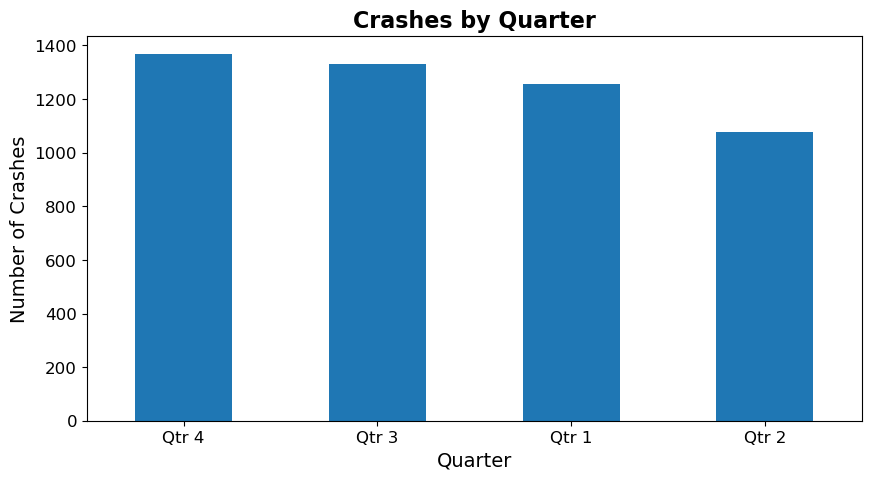

In [26]:
plt.figure(figsize=(10, 5))
df['Quarter'].value_counts().sort_values(ascending=False).plot(
    kind='bar',
    title='Crashes by Month'
)

# Customize labels and title
plt.title('Crashes by Quarter', fontsize=16, fontweight='bold') 
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12, rotation=0)  
plt.yticks(fontsize=12)

# Show the plot
plt.show()

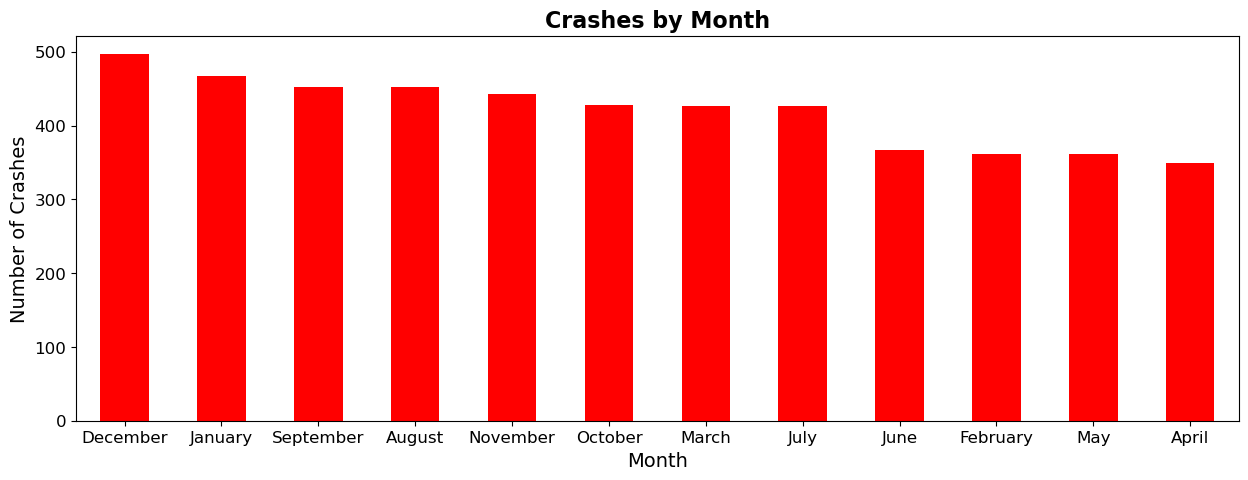

In [27]:
plt.figure(figsize=(15, 5))

df['Month'].value_counts().sort_values(ascending=False).plot(
    kind='bar',
    color='red',
    title='Crashes by Month'
)

# Customize labels and title
plt.title('Crashes by Month', fontsize=16, fontweight='bold') 
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

The chart above shows that the months of December and January sees the most airplane crash incidents. This makes sense due to a couple factors mainly of which is the winter period, this two months fall in the winter period and this period is notoriously more harsh for airplanes plus the fact that its also the holiday season which adds travel volume, schedule issues and fatigue to pilots, all these factors combined makes these two months the highest in aircraft crash incidents. 

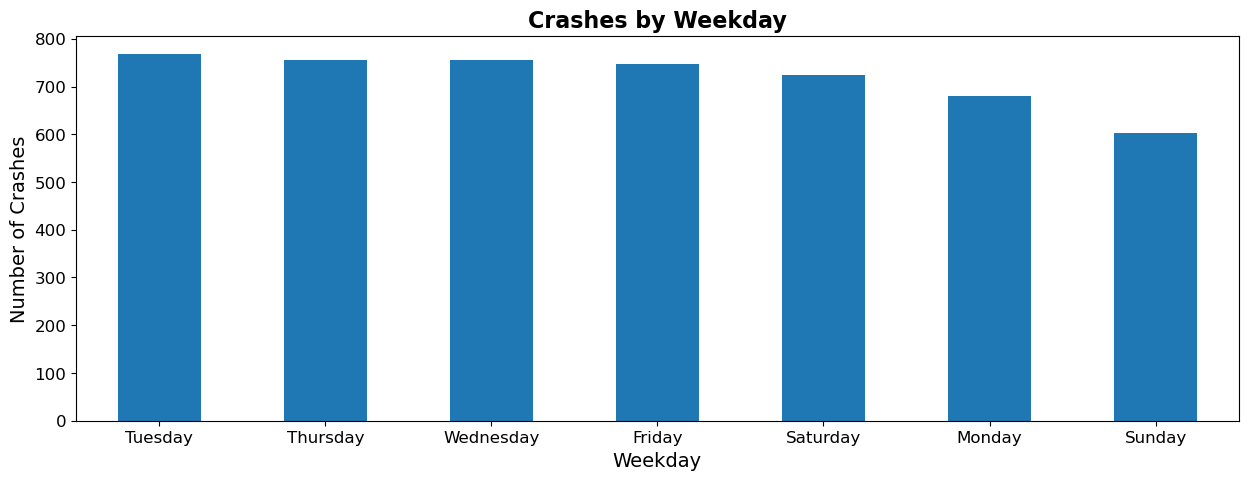

In [28]:
plt.figure(figsize=(15, 5))  # Set the figure size (width, height in inches)
df['Weekday'].value_counts().sort_values(ascending=False).plot(
    kind='bar',
    title='Crashes by Month'
)

# Customize labels and title
plt.title('Crashes by Weekday', fontsize=16, fontweight='bold')  # Larger, bold title
plt.xlabel('Weekday', fontsize=14)  # X-axis label
plt.ylabel('Number of Crashes', fontsize=14)  # Y-axis label

# Customize ticks
plt.xticks(fontsize=12, rotation=0) 
plt.yticks(fontsize=12)

# Show the plot
plt.show()

## Categorical Multivariate

Summary DataFrame:
          Manufacturer                                    Aircraft  Crash Count
1              Boeing                                Boeing B 737           73
0   McDonnell Douglas                      McDonnell Douglas DC 9           42
11            Convair                              Convair CV 240           19
10            Junkers                           Junkers JU 52/3mD           16
7             Curtiss                               Curtiss C 46A           14
3             Antonov                           Antonov AN 24CCCP           14
5            Ilyushin                         Ilyushin IL 14PCCCP           12
2        De Havilland  de Havilland Canada DHC 6 Twin Otter 300PK           12
4     Lockheed Martin                              Lockheed L 100           11
8             Tupolev                         Tupolev TU 134ACCCP           10
6              Fokker                Fokker F 27 Friendship 600XY            7
12          Fairchild           

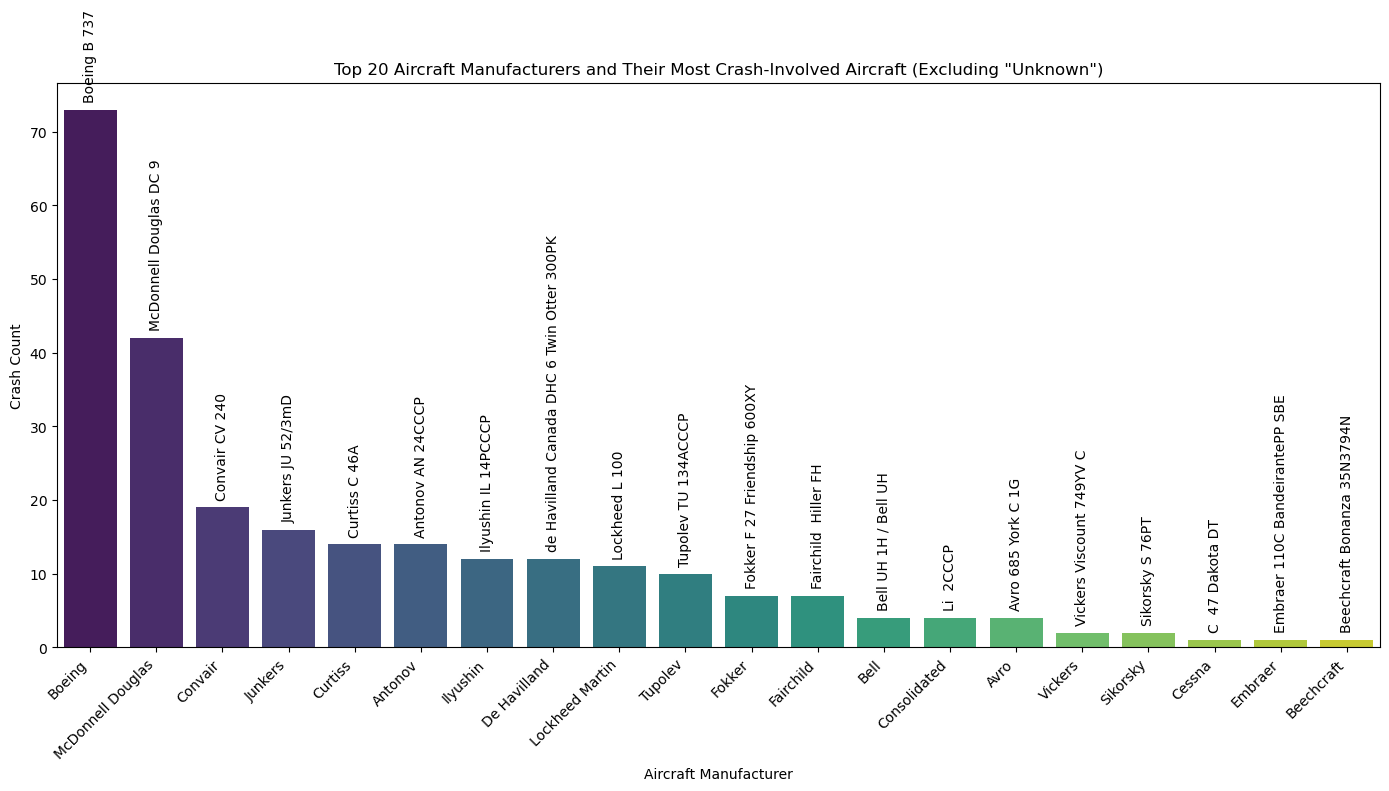

In [29]:
# Exclude 'Unknown' from the data
filtered_df = df[df['Aircraft Manufacturer'] != 'Unknown']
# Group by manufacturer and count crashes
manufacturer_crashes = filtered_df.groupby('Aircraft Manufacturer')['Aircraft'].count().reset_index()
manufacturer_crashes.columns = ['Aircraft Manufacturer', 'Total Crashes']
manufacturer_crashes = manufacturer_crashes.sort_values(by='Total Crashes', ascending=False).head(20)

# Find the most crash-involved aircraft for each manufacturer
top_manufacturers = manufacturer_crashes['Aircraft Manufacturer'].tolist()
most_crashed_aircraft = []

for manufacturer in top_manufacturers:
    aircraft_data = df[df['Aircraft Manufacturer'] == manufacturer]
    if not aircraft_data['Aircraft'].empty:
        most_crashed_df = aircraft_data['Aircraft'].value_counts().reset_index()
        if not most_crashed_df.empty:
            most_crashed_aircraft.append([
            manufacturer,
            most_crashed_df.iloc[0, 0],  # First column (aircraft model)
            most_crashed_df.iloc[0, 1]   # Second column (crash count)
    ])
    else:
        most_crashed_aircraft.append([manufacturer, None, 0])  # Handle cases with no data

# Create a DataFrame for visualization
summary_df = pd.DataFrame(most_crashed_aircraft, columns=['Manufacturer', 'Aircraft', 'Crash Count'])
summary_df = summary_df.sort_values(by='Crash Count', ascending=False)
print("Summary DataFrame:\n", summary_df)

# Visualize as a bar plot
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    data=summary_df,
    x='Manufacturer',
    y='Crash Count',
    palette='viridis'
)

# Annotate each bar with the corresponding aircraft name
for bar, aircraft in zip(barplot.patches, summary_df['Aircraft']):
    bar_height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate: Center of the bar
        bar_height + 1,                    # Y-coordinate: Slightly above the bar
        aircraft,                          # Text to display
        ha='center',                       # Horizontal alignment
        va='bottom',                       # Vertical alignment
        fontsize=10,                       # Font size
        color='black',                     # Text color
        rotation=90                        # Rotate text for readability
    )

# Finalize the plot
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Aircraft Manufacturers and Their Most Crash-Involved Aircraft (Excluding "Unknown")')
plt.xlabel('Aircraft Manufacturer')
plt.ylabel('Crash Count')
plt.tight_layout()
plt.show()


                           Country Aircraft Manufacturer  Crash Count
1451                           USA     McDonnell Douglas          241
1138                        Russia               Antonov           83
296                       Colombia     McDonnell Douglas           64
266                          China     McDonnell Douglas           46
593                          India     McDonnell Douglas           45
163                         Brazil     McDonnell Douglas           45
218                         Canada     McDonnell Douglas           35
471                         France     McDonnell Douglas           34
1085                   Philippines     McDonnell Douglas           29
1396                            UK     McDonnell Douglas           28
864                         Mexico     McDonnell Douglas           27
703                          Italy     McDonnell Douglas           24
1506                     Venezuela     McDonnell Douglas           23
338   Democratic Rep

AttributeError: Rectangle.set() got an unexpected keyword argument 'legend'

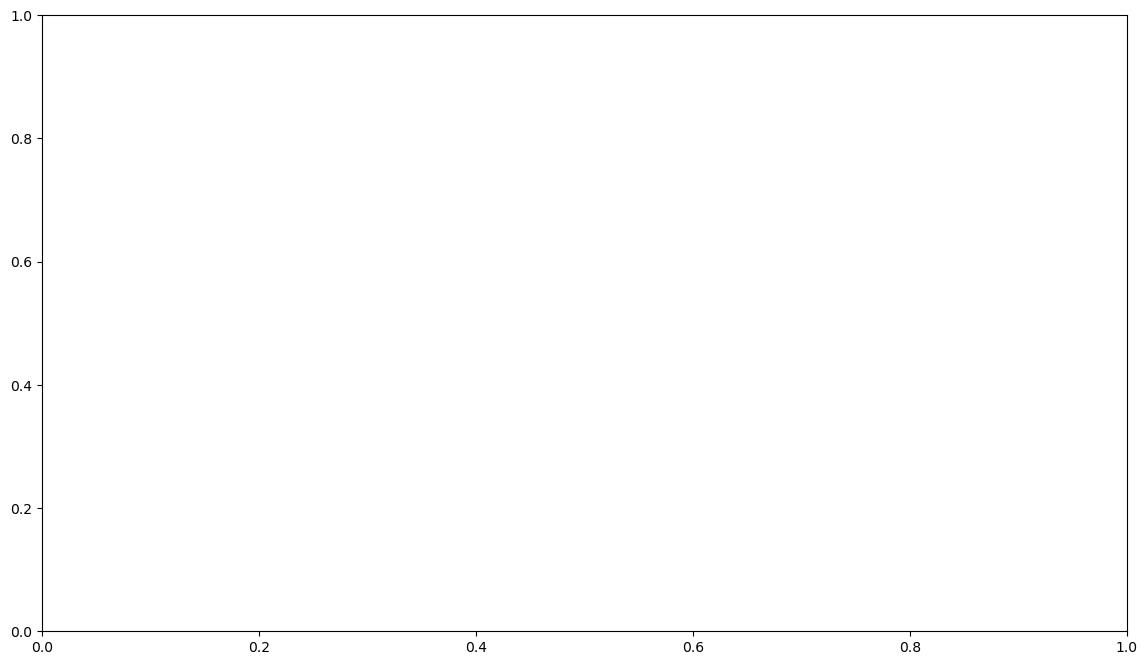

In [30]:
# Group by Country and Aircraft Manufacturer, and count the crashes
manufacturer_country_crashes = df.groupby(['Country', 'Aircraft Manufacturer']).size().reset_index(name='Crash Count')

# Get the total crash count per country
country_crash_counts = manufacturer_country_crashes.groupby('Country')['Crash Count'].sum().sort_values(ascending=False).head(20).index.tolist()

# Filter to include only the top 20 countries
filtered_data = manufacturer_country_crashes[manufacturer_country_crashes['Country'].isin(country_crash_counts)]

# Now, for each country, find the aircraft manufacturer with the highest crash count
top_manufacturers_by_country = filtered_data.loc[filtered_data.groupby('Country')['Crash Count'].idxmax()]

# Sort the result by Crash Count in descending order
top_manufacturers_by_country_sorted = top_manufacturers_by_country.sort_values(by='Crash Count', ascending=False)

# Display the summary dataframe
print(top_manufacturers_by_country_sorted)

# Visualize as a bar plot
plt.figure(figsize=(14, 8))
barplot = sns.barplot(
    data=top_manufacturers_by_country_sorted,
    x='Country',
    y='Crash Count',
    hue='Aircraft Manufacturer',
    palette='viridis',
    legend=False
)

# Annotate each bar with the corresponding aircraft manufacturer
for bar, manufacturer in zip(barplot.patches, top_manufacturers_by_country_sorted['Aircraft Manufacturer']):
    bar_height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate: Center of the bar
        bar_height + 1,                    # Y-coordinate: Slightly above the bar
        manufacturer,                      # Text to display (manufacturer)
        ha='center',                       # Horizontal alignment
        va='bottom',                       # Vertical alignment
        fontsize=10,                       # Font size
        color='black',                     # Text color
        rotation=90                        # Rotate text for readability
    )

# Finalize the plot
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Countries and Their Most Crash-Involved Aircraft Manufacturers')
plt.xlabel('Country')
plt.ylabel('Crash Count')
plt.tight_layout()
plt.show()



## Multivariate EDA

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23672\890272913.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


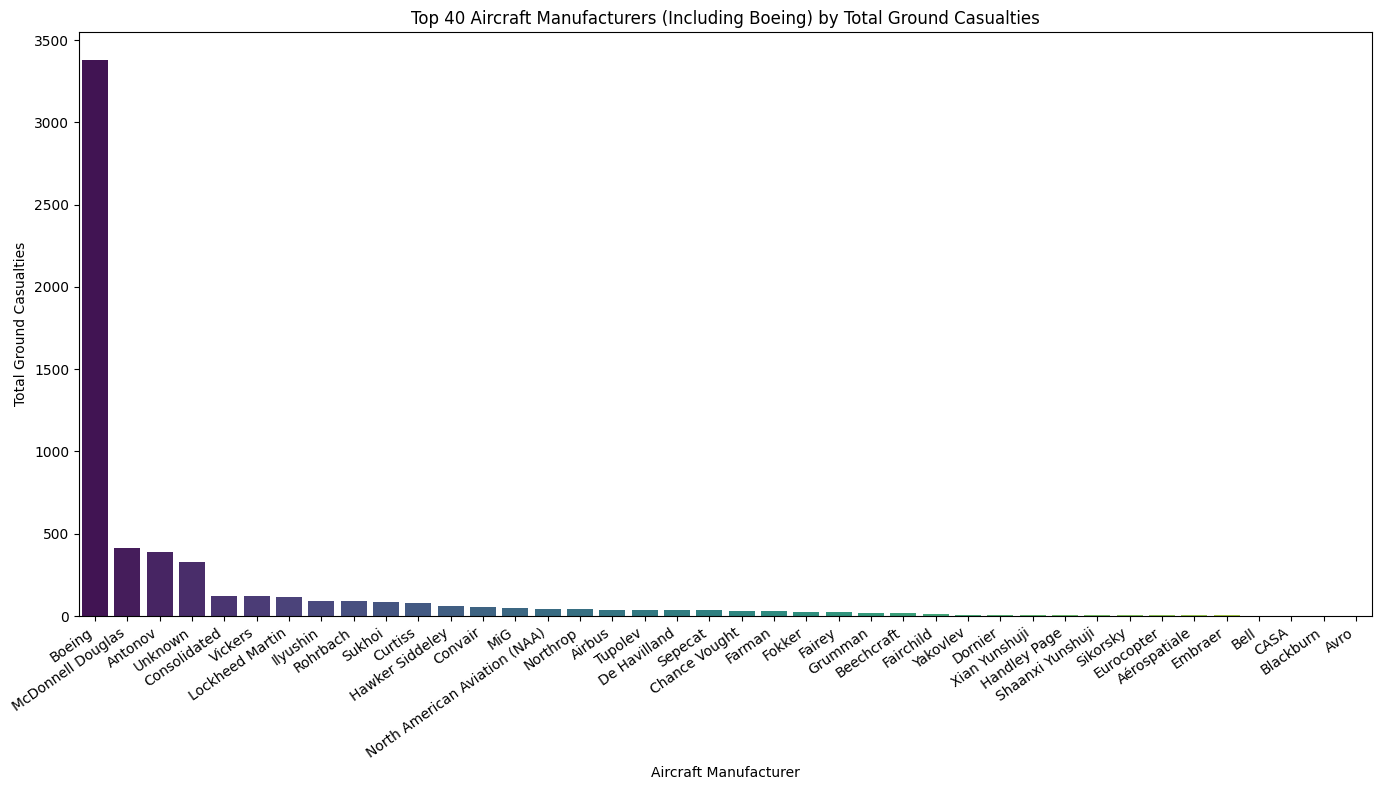

In [30]:
# Group by Aircraft Manufacturer and sum the ground fatalities
manufacturer_ground_fatalities = df.groupby('Aircraft Manufacturer')['Ground'].sum().reset_index()

# Sort manufacturers by the sum of ground fatalities in descending order
manufacturer_ground_fatalities_sorted = manufacturer_ground_fatalities.sort_values(by='Ground', ascending=False)

# Select the top 40 manufacturers
top_40_manufacturers = manufacturer_ground_fatalities_sorted.head(40)

# Visualize the results as a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_40_manufacturers,
    x='Aircraft Manufacturer',
    y='Ground',
    palette='viridis'
)

# Add titles and labels
plt.xticks(rotation=35, ha='right')
plt.title('Top 40 Aircraft Manufacturers (Including Boeing) by Total Ground Casualties')
plt.xlabel('Aircraft Manufacturer')
plt.ylabel('Total Ground Casualties')
plt.tight_layout()

# Display the plot
plt.show()


It is worth noting the the events on 9/11 causes Boeing to be an extreme outlier which is the reason ive excluded it in the next chart

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23672\750498658.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


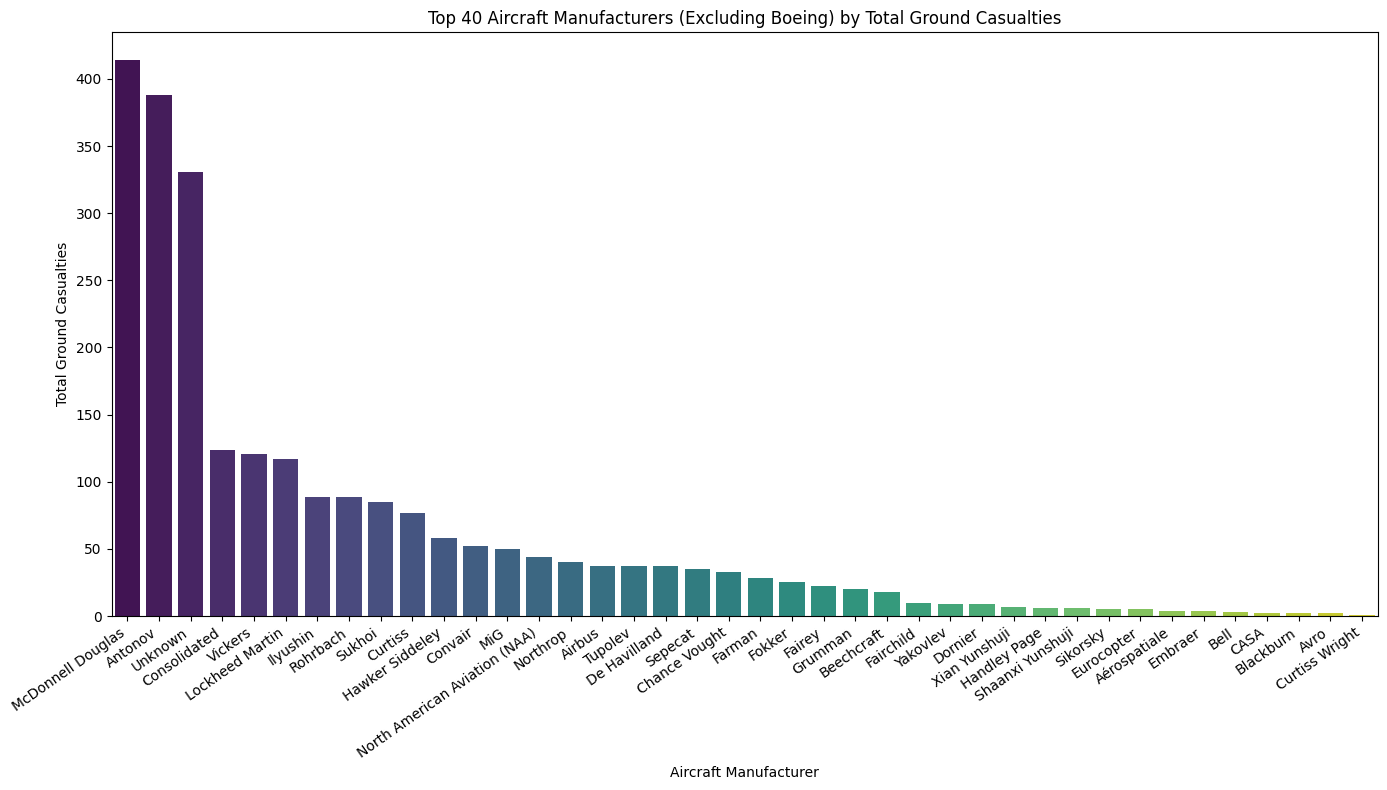

In [31]:
# Exclude 'Boeing' from the dataset
df_filtered = df[df['Aircraft Manufacturer'] != 'Boeing']

# Group by Aircraft Manufacturer and sum the ground fatalities
manufacturer_ground_fatalities = df_filtered.groupby('Aircraft Manufacturer')['Ground'].sum().reset_index()

# Sort manufacturers by the sum of ground fatalities in descending order
manufacturer_ground_fatalities_sorted = manufacturer_ground_fatalities.sort_values(by='Ground', ascending=False)

# Select the top 40 manufacturers
top_40_manufacturers = manufacturer_ground_fatalities_sorted.head(40)

# Visualize the results as a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_40_manufacturers,
    x='Aircraft Manufacturer',
    y='Ground',
    palette='viridis'
)

# Add titles and labels
plt.xticks(rotation=35, ha='right')
plt.title('Top 40 Aircraft Manufacturers (Excluding Boeing) by Total Ground Casualties')
plt.xlabel('Aircraft Manufacturer')
plt.ylabel('Total Ground Casualties')
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23672\1661216031.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


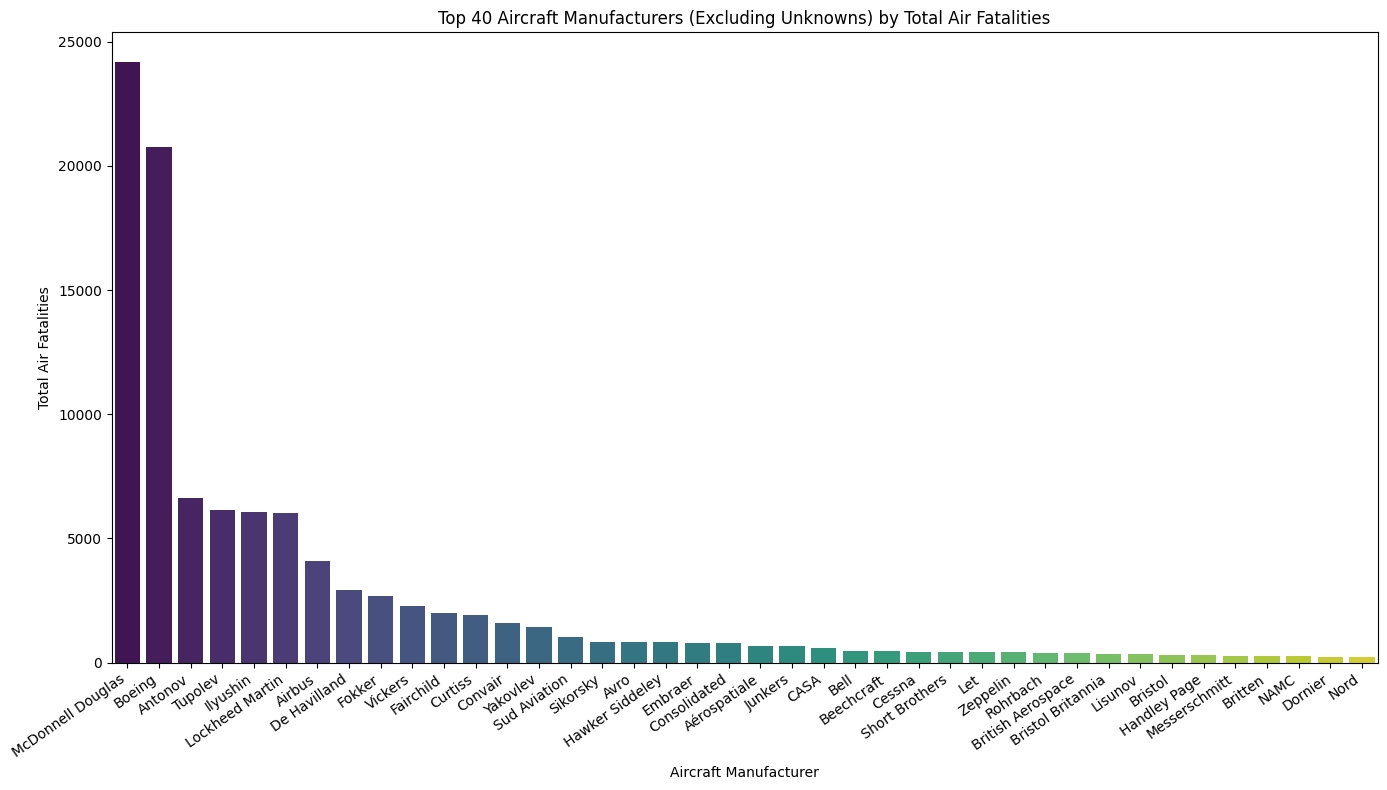

In [32]:
# Exclude 'Boeing' from the dataset
df_filtered = df[df['Aircraft Manufacturer'] != 'Unknown']

# Group by Aircraft Manufacturer and sum the ground fatalities
manufacturer_ground_fatalities = df_filtered.groupby('Aircraft Manufacturer')['Fatalities (air)'].sum().reset_index()

# Sort manufacturers by the sum of ground fatalities in descending order
manufacturer_ground_fatalities_sorted = manufacturer_ground_fatalities.sort_values(by='Fatalities (air)', ascending=False)

# Select the top 40 manufacturers
top_40_manufacturers = manufacturer_ground_fatalities_sorted.head(40)

# Visualize the results as a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_40_manufacturers,
    x='Aircraft Manufacturer',
    y='Fatalities (air)',
    palette='viridis'
)

# Add titles and labels
plt.xticks(rotation=35, ha='right')
plt.title('Top 40 Aircraft Manufacturers (Excluding Unknowns) by Total Air Fatalities')
plt.xlabel('Aircraft Manufacturer')
plt.ylabel('Total Air Fatalities')
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23672\486277075.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


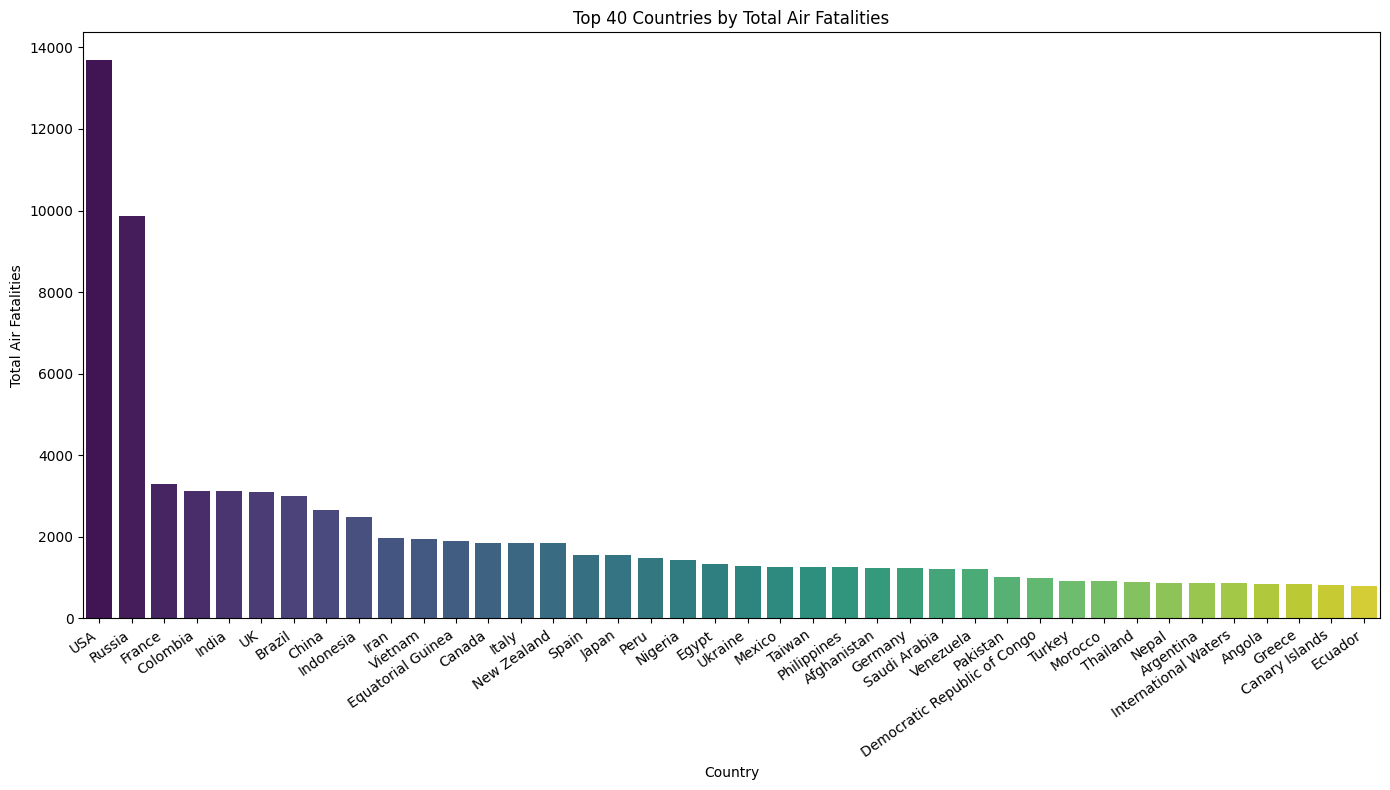

In [33]:
# Group by Country and sum the ground fatalities
manufacturer_ground_fatalities = df.groupby('Country')['Fatalities (air)'].sum().reset_index()

# Sort manufacturers by the sum of ground fatalities in descending order
manufacturer_ground_fatalities_sorted = manufacturer_ground_fatalities.sort_values(by='Fatalities (air)', ascending=False)

# Select the top 40 manufacturers
top_40_manufacturers = manufacturer_ground_fatalities_sorted.head(40)

# Visualize the results as a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_40_manufacturers,
    x='Country',
    y='Fatalities (air)',
    palette='viridis'
)

# Add titles and labels
plt.xticks(rotation=35, ha='right')
plt.title('Top 40 Countries by Total Air Fatalities')
plt.xlabel('Country')
plt.ylabel('Total Air Fatalities')
plt.tight_layout()

# Display the plot
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23672\3384052593.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


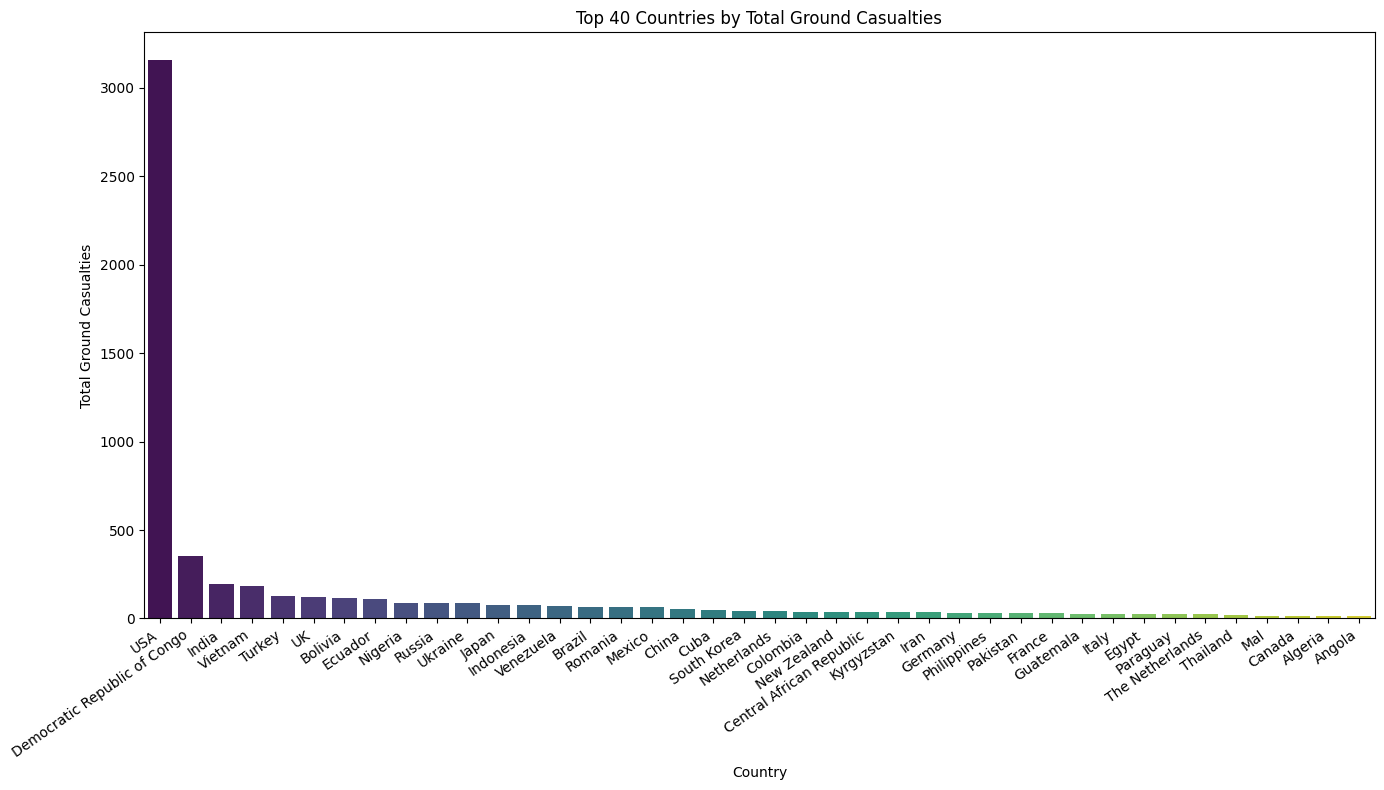

In [34]:
# Group by Country and sum the ground fatalities
manufacturer_ground_fatalities = df.groupby('Country')['Ground'].sum().reset_index()

# Sort manufacturers by the sum of ground fatalities in descending order
manufacturer_ground_fatalities_sorted = manufacturer_ground_fatalities.sort_values(by='Ground', ascending=False)

# Select the top 40 manufacturers
top_40_manufacturers = manufacturer_ground_fatalities_sorted.head(40)

# Visualize the results as a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_40_manufacturers,
    x='Country',
    y='Ground',
    palette='viridis'
)

# Add titles and labels
plt.xticks(rotation=35, ha='right')
plt.title('Top 40 Countries by Total Ground Casualties')
plt.xlabel('Country')
plt.ylabel('Total Ground Casualties')
plt.tight_layout()

# Display the plot
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_23672\794477940.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


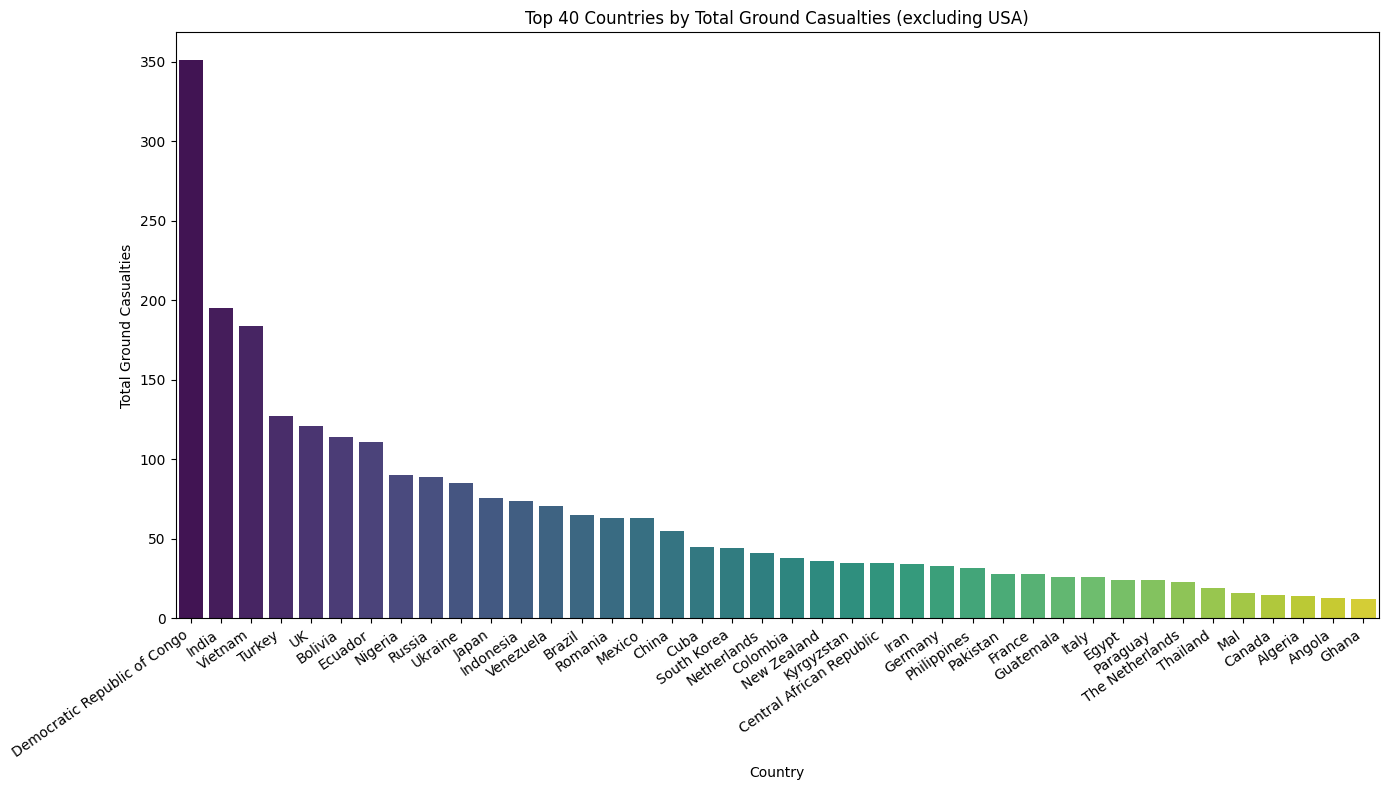

In [35]:
df_filtered = df[df['Country'] != 'USA']

# Group by Country and sum the ground fatalities
manufacturer_ground_fatalities = df_filtered.groupby('Country')['Ground'].sum().reset_index()

# Sort manufacturers by the sum of ground fatalities in descending order
manufacturer_ground_fatalities_sorted = manufacturer_ground_fatalities.sort_values(by='Ground', ascending=False)

# Select the top 40 manufacturers
top_40_manufacturers = manufacturer_ground_fatalities_sorted.head(40)

# Visualize the results as a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_40_manufacturers,
    x='Country',
    y='Ground',
    palette='viridis'
)

# Add titles and labels
plt.xticks(rotation=35, ha='right')
plt.title('Top 40 Countries by Total Ground Casualties (excluding USA)')
plt.xlabel('Country')
plt.ylabel('Total Ground Casualties')
plt.tight_layout()

# Display the plot
plt.show()

In [36]:
df.to_csv('airplane_crashes_eda_cleaned.csv', index=False)